<a href="https://colab.research.google.com/github/AndresVillotaVillota/Competencia-Kaggle-sabrepro-2025-1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Selecciona el ZIP desde tu computador
uploaded = files.upload()

Saving udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip to udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip


In [3]:
import zipfile
import os

# Descomprimir el archivo ZIP
zip_path = "udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip"
extract_path = "datos_saberpro"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifica que los archivos estén listos
print("Archivos extraídos:", os.listdir(extract_path))

Archivos extraídos: ['train.csv', 'submission_example.csv', 'test.csv']


In [4]:
import pandas as pd

# Leer archivos ya extraídos
train = pd.read_csv("datos_saberpro/train.csv")
test = pd.read_csv("datos_saberpro/test.csv")
sample_submission = pd.read_csv("datos_saberpro/submission_example.csv")

# Vista previa
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Train shape: (692500, 21)
Test shape: (296786, 20)


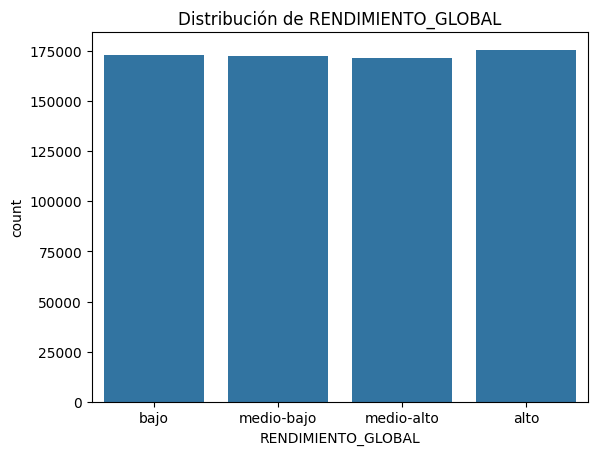

FAMI_TIENEAUTOMOVIL               0.062994
FAMI_TIENELAVADORA                0.057434
FAMI_TIENECOMPUTADOR              0.055022
FAMI_ESTRATOVIVIENDA              0.046407
ESTU_HORASSEMANATRABAJA           0.044559
FAMI_TIENEINTERNET.1              0.038453
FAMI_TIENEINTERNET                0.038453
FAMI_EDUCACIONMADRE               0.034172
FAMI_EDUCACIONPADRE               0.033470
ESTU_PAGOMATRICULAPROPIO          0.009383
ESTU_VALORMATRICULAUNIVERSIDAD    0.009079
dtype: float64
ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD     object
ESTU_HORASSEMANATRABAJA            object
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_TIENELAVADORA                 object
FAMI_TIENEAUTOMOVIL                object
ESTU_PRIVADO_LIBERTAD              object
ESTU_PAG

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,0.128251,0.378495,0.211115,0.282139
Estrato 2,0.197481,0.271061,0.255881,0.275578
Estrato 3,0.280613,0.202938,0.269791,0.246657
Estrato 4,0.436914,0.138352,0.246573,0.178160
Estrato 5,0.525881,0.115681,0.216537,0.141901
Estrato 6,0.606743,0.102102,0.183578,0.107576
Sin Estrato,0.178778,0.436607,0.176041,0.208574


In [6]:
# 01 - exploración.ipynb

# ✅ EXPLORACIÓN INICIAL DE LOS DATOS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
train = pd.read_csv("datos_saberpro/train.csv")
test = pd.read_csv("datos_saberpro/test.csv")

# Ver formas y primeras filas
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

# Distribución de la variable objetivo
sns.countplot(data=train, x="RENDIMIENTO_GLOBAL", order=["bajo", "medio-bajo", "medio-alto", "alto"])
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.show()

# Ver valores faltantes
missing = train.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])

# Tipos de datos
print(train.dtypes)

# Valores únicos por columna
for col in train.columns:
    print(f"{col}: {train[col].nunique()} valores únicos")

# Ejemplo de cruces
pd.crosstab(train["FAMI_ESTRATOVIVIENDA"], train["RENDIMIENTO_GLOBAL"], normalize="index")